In [5]:
truthfile = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/data/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055_cn_annotated_maxmin.bb" 
postfile = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/free/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055/hatchet/edited/hatchet.seg.ucn_20211231120537.tsv" 
prefile = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/free/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055/hatchet/hatchet.seg.ucn_cn_annotated_maxmin.bb"

In [6]:
true_colordict = {0: "#d3fe14", 
             1: "#c9080a",
             2: "#fec7f8",
             3: "#0b7b3e",
             4: "#3957ff",
             5: "#0bf0e9",
             6: "#c203c8",
             7: "#fd9b39",
             8: "#906407",
             9: "#98ba7f",
             10: "#fe6794",
             11: "#10b0ff",
             12: "#ac7bff", 
             13: "#fee7c0",
             14: "#964c63",
             15: "#1da49c",
             16: "#0ad811",
             17: "#bbd9fd",
             18: "#fe6cfe",
             19: "#d1a09c",
             20: "#78579e",
             21: "#81ffad"
            }
edited_colordict = {0: "#d3fe14", 
             1: "#c9080a",
             2: "#fec7f8",
             3: "#0b7b3e",
             4: "#37d67a",
             5: "#0bf0e9",
             6: "#c203c8",
             7: "#fd9b39",
             8: "#906407",
             9: "#98ba7f",
             10: "#fe6794",
             11: "#10b0ff",
             12: "#ac7bff", 
             13: "#fee7c0",
             14: "#964c63",
             15: "#1da49c",
             16: "#0ad811",
             17: "#bbd9fd",
             18: "#fe6cfe",
             19: "#d1a09c",
             20: "#78579e",
             21: "#81ffad",
             22: "#739400",
             23: "#ca6949"
            }
inferred_colordict = {0: "#d3fe14", 
             1: "#c9080a",
             2: "#fec7f8",
             3: "#0b7b3e",
             4: "#3957ff",
             5: "#0bf0e9",
             6: "#c203c8",
             7: "#fd9b39",
             8: "#906407",
             9: "#98ba7f",
             10: "#fe6794",
             11: "#10b0ff",
             12: "#ac7bff", 
             13: "#fee7c0",
             14: "#964c63",
             15: "#1da49c",
             16: "#0ad811",
             17: "#bbd9fd"
            }


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
def read_file(f):
    with open(f, "r") as r:
        lines = r.readlines()
        return [line.strip().split('\t') for line in lines]

In [23]:
s1_truth = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/data/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055_truth.clusters.bulk_08clone1_Noneclone0_02normal.txt"
s2_truth = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/data/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055_truth.clusters.bulk_035clone1_06clone0_005normal.txt"
s3_truth = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/data/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055_truth.clusters.bulk_055clone1_04clone0_005normal.txt"

s1_post = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/free/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055/hatchet/sankey/post.clusters.bulk_08clone1_Noneclone0_02normal.txt"
s2_post = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/free/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055/hatchet/sankey/post.clusters.bulk_035clone1_06clone0_005normal.txt"
s3_post = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/free/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055/hatchet/sankey/post.clusters.bulk_055clone1_04clone0_005normal.txt"

s1_pre = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/free/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055/hatchet/sankey/pre.clusters.bulk_08clone1_Noneclone0_02normal.txt"
s2_pre = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/free/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055/hatchet/sankey/pre.clusters.bulk_035clone1_06clone0_005normal.txt"
s3_pre = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/free/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055/hatchet/sankey/pre.clusters.bulk_055clone1_04clone0_005normal.txt"

s1_true_lines = read_file(s1_truth)
s2_true_lines = read_file(s2_truth)
s3_true_lines = read_file(s3_truth)

s1_post_lines = read_file(s1_post)
s2_post_lines = read_file(s2_post)
s3_post_lines = read_file(s3_post)

s1_pre_lines = read_file(s1_pre)
s2_pre_lines = read_file(s2_pre)
s3_pre_lines = read_file(s3_pre)

In [24]:
true_lines = read_file(truthfile)
post_lines = read_file(postfile)
pre_lines = read_file(prefile)

def find_diff_idxs(pre_lines, post_lines):
    idxs = []

    for i in range(len(pre_lines)):
        c1 = pre_lines[i]
        c2 = post_lines[i]
        if c1 != c2:
            idxs.append(i)
    return idxs

d = find_diff_idxs(s1_pre_lines, s1_post_lines)

rd, baf, clusters = [], [], []
rd_focus, baf_focus, clusters_focus = [], [], []

sample_idx = [i for i in range(len(pre_lines[0])) if pre_lines[0][i] == 'SAMPLE'][0]
rd_idx, baf_idx, cluster_idx = [i for i in range(len(pre_lines[0])) if pre_lines[0][i] == 'RD'][0], [i for i in range(len(pre_lines[0])) if pre_lines[0][i] == 'BAF'][0], -1

sample_i = 0 
for i, line in enumerate(pre_lines[1:]):
    if line[sample_idx] == 'bulk_035clone1_06clone0_005normal':
        if sample_i in set(d):
            rd_focus.append(float(line[rd_idx]))
            baf_focus.append(0.5 - float(line[baf_idx]))
            # clusters_focus.append(int(line[cluster_idx]))
            clusters_focus.append(sample_i)
        else:  
            rd.append(float(line[rd_idx]))
            baf.append(0.5 - float(line[baf_idx]))
            # clusters.append(int(line[cluster_idx]))
            clusters.append(sample_i)

        sample_i += 1

In [25]:
gray_dict = dict()
for key in edited_colordict:
    gray_dict[key] = "lightgray"

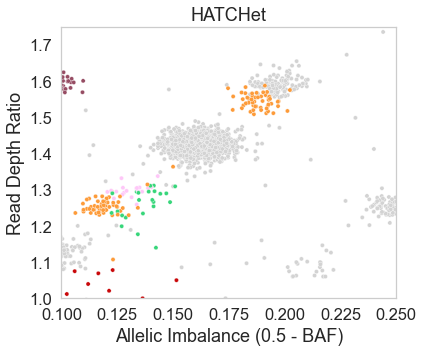

In [26]:
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
plt.gca().grid(False)

df_pre = pd.read_csv(prefile, sep="\t")
df_pre["mBAF"] = 0.5 - df_pre["BAF"]
# ax.grid(False)

df_pre_proc = df_pre[df_pre["SAMPLE"]=="bulk_035clone1_06clone0_005normal"]
clusters_other = df_pre_proc.iloc[clusters]
clusters_f = df_pre_proc.iloc[clusters_focus]

sns.scatterplot(data=clusters_other, x="mBAF", y="RD", hue="CLUSTER", palette=gray_dict, size=0.7, legend=False)
sns.scatterplot(data=clusters_f, x="mBAF", y="RD", hue="CLUSTER", palette=edited_colordict, size=0.7, legend=False)

plt.gca().grid(False)
plt.gca().set_xlim((0.1, 0.25))
plt.gca().set_ylim((1.0, 1.75))
plt.gca().set_xlabel("Allelic Imbalance (0.5 - BAF)")
plt.gca().set_ylabel("Read Depth Ratio")
plt.gca().set_title("HATCHet")
plt.gcf().set_size_inches((6,5))

plt.savefig("/Users/gillianchu/mek/cnaviz/simulations/scripts/sim_plot/scatterplots/s4669_hatchet_merge1.svg", bbox_inches='tight', dpi=300)  


In [27]:
df_post = pd.read_csv(postfile, sep="\t")
df_post["mBAF"] = 0.5 - df_post["BAF"]

df_post_proc = df_post[df_post["SAMPLE"]=="bulk_035clone1_06clone0_005normal"]

clusters_other = df_post_proc.iloc[clusters]
clusters_f = df_post_proc.iloc[clusters_focus]


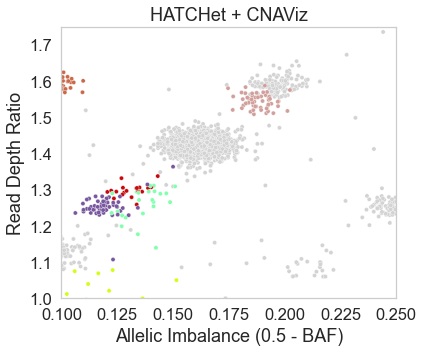

In [28]:
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
plt.gca().grid(False)

sns.scatterplot(data=clusters_other, x="mBAF", y="RD", hue="CLUSTER", palette=gray_dict, size=0.7, legend=False)
sns.scatterplot(data=clusters_f, x="mBAF", y="RD", hue="CLUSTER", palette=edited_colordict, size=0.7, legend=False)

plt.gca().set_xlim((0.1, 0.25))
plt.gca().set_ylim((1.0, 1.75))
plt.gca().set_xlabel("Allelic Imbalance (0.5 - BAF)")
plt.gca().set_ylabel("Read Depth Ratio")
plt.gca().set_title("HATCHet + CNAViz")
plt.gcf().set_size_inches((6,5))

plt.savefig("/Users/gillianchu/mek/cnaviz/simulations/scripts/sim_plot/scatterplots/s4669_hatchet_cnaviz_merge1.svg", bbox_inches='tight', dpi=300)